In [2]:
import pybullet as p
import pybullet_data as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline
p.connect(p.DIRECT)
#allow to find the assets (URDF, obj, textures etc)
p.setAdditionalSearchPath(pd.getDataPath())
#optionally enable GPU for faster rendering in pybullet.getCameraImage
enableGPU = True
import GPUtil as GPU
import sys
# Get all device ids and their processing and memory utiliazion
# (deviceIds, gpuUtil, memUtil) = GPU.getGPUs()

# Print os and python version information
print('OS: ' + sys.platform)
print(sys.version)

# Print package name and version number
print(GPU.__name__ + ' ' + GPU.__version__)

# Show the utilization of all GPUs in a nice table
GPU.showUtilization()

# Show all stats of all GPUs in a nice table
GPU.showUtilization(all=True)

OS: linux
3.11.8 (main, Feb 26 2024, 21:39:34) [GCC 11.2.0]
GPUtil 1.4.0
| ID | GPU | MEM |
------------------
|  0 |  4% |  6% |
| ID | Name                       | Serial | UUID                                     || GPU temp. | GPU util. | Memory util. || Memory total | Memory used | Memory free || Display mode | Display active |
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  0 | NVIDIA GeForce RTX 3080 Ti | [N/A]  | GPU-f27e0edc-1104-9209-ec75-f723d0abe3a1 ||       48C |        4% |           6% ||      12288MB |       794MB |     11293MB || Enabled      | Enabled        |


In [3]:
p.resetSimulation()
p.configureDebugVisualizer(p.COV_ENABLE_GUI)
useFixedBase = True
flags = p.URDF_INITIALIZE_SAT_FEATURES

plane_pos = [0,0,-0.625]
plane = p.loadURDF("plane.urdf", plane_pos, flags = flags, useFixedBase=useFixedBase)
table_pos = [0,0,-0.625]
table = p.loadURDF("table/table.urdf", table_pos, flags = flags, useFixedBase=useFixedBase)
xarm = p.loadURDF("xarm/xarm6_robot.urdf", flags = flags, useFixedBase=useFixedBase)
xarm = p.loadURDF("laikago/laikago_toes.urdf", [1,0,-0.15],[0, 0.5, 0.5, 0], flags = flags, useFixedBase=useFixedBase)

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 2.86 µs
w= 640 h= 480
w= 640 h= 480
w= 640 h= 480
w= 640 h= 480


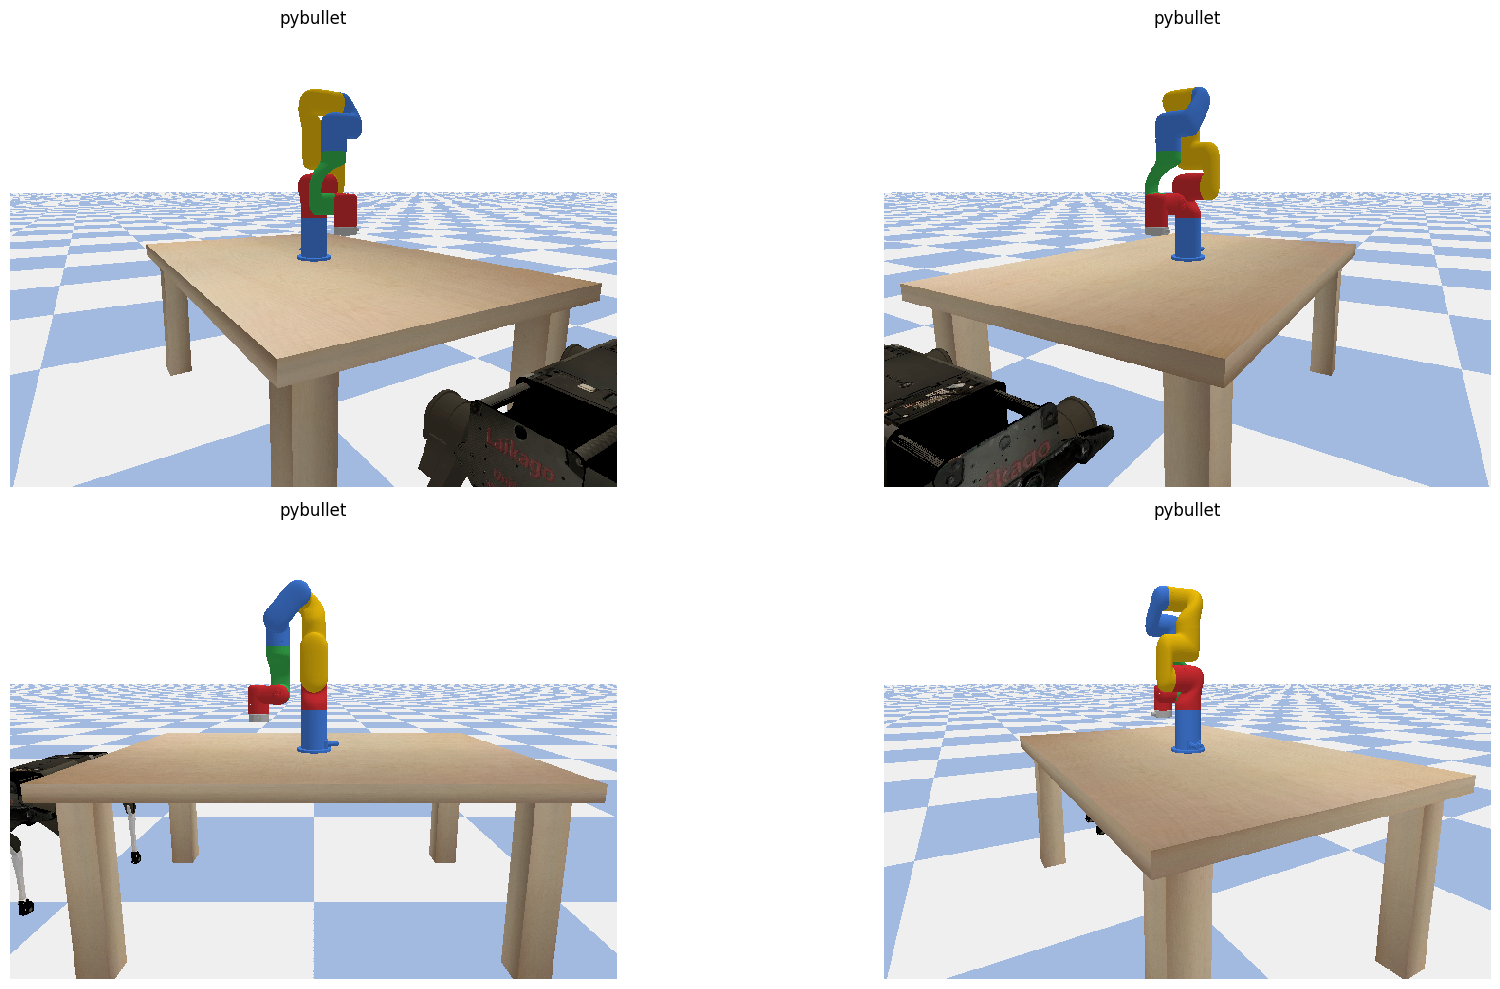

In [4]:
%time
camTargetPos = [0, 0, 0]
cameraUp = [0, 0, 1]
cameraPos = [1, 1, 1]
p.setGravity(0, 0, -10)

import numpy as np
import random
import time
from matplotlib import pyplot as plt

# Removed widgets.Grid(2, 2) and replaced with matplotlib subplot
yaw = 0
fig, axs = plt.subplots(2, 2, figsize=(20, 10)) # Adjusted size for visibility
for r in range(2):
    for c in range(2):
        yaw += 60
        ax = axs[r, c]
        pitch = -10.0
        roll = 0
        upAxisIndex = 2
        camDistance = 1.5
        pixelWidth = 640
        pixelHeight = 480
        nearPlane = 0.01
        farPlane = 100
        fov = 60
        viewMatrix = p.computeViewMatrixFromYawPitchRoll(camTargetPos, camDistance, yaw, pitch, roll, upAxisIndex)
        aspect = pixelWidth / pixelHeight
        projectionMatrix = p.computeProjectionMatrixFOV(fov, aspect, nearPlane, farPlane)

        img_arr = p.getCameraImage(pixelWidth, pixelHeight, viewMatrix, projectionMatrix)
        w = img_arr[0]  # width of the image, in pixels
        h = img_arr[1]  # height of the image, in pixels
        rgb = img_arr[2]  # color data RGB
        dep = img_arr[3]  # depth data
        print("w=", w, "h=", h)
        np_img_arr = np.reshape(rgb, (h, w, 4))
        np_img_arr = np_img_arr * (1. / 255.)
        ax.imshow(np_img_arr, interpolation='none', animated=True)
        ax.set_title("pybullet") # If needed
        ax.axis('off') # To remove axis if you prefer

plt.tight_layout()
plt.show()


creating animated png, please about 5 seconds
CPU times: user 1.55 s, sys: 11.4 ms, total: 1.56 s
Wall time: 1.59 s
CPU times: user 363 µs, sys: 110 µs, total: 473 µs
Wall time: 16.1 ms


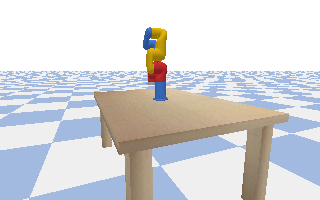

In [5]:
from numpngw import write_apng
from IPython.display import Image


frames=[] #frames to create animated png
for r in range(60):
    yaw += 6
    pitch = -10.0
    roll = 0
    upAxisIndex = 2
    camDistance = 1.5
    pixelWidth = 320
    pixelHeight = 200
    nearPlane = 0.01
    farPlane = 100
    fov = 60
    viewMatrix = p.computeViewMatrixFromYawPitchRoll(camTargetPos, camDistance, yaw, pitch,
                                                                roll, upAxisIndex)
    aspect = pixelWidth / pixelHeight
    projectionMatrix = p.computeProjectionMatrixFOV(fov, aspect, nearPlane, farPlane)
        
    img_arr = p.getCameraImage(pixelWidth,pixelHeight,viewMatrix,projectionMatrix)
    w = img_arr[0]  #width of the image, in pixels
    h = img_arr[1]  #height of the image, in pixels
    rgb = img_arr[2]  #color data RGB
    dep = img_arr[3]  #depth data
    #print("w=",w,"h=",h)
    np_img_arr = np.reshape(rgb, (h, w, 4))
    frame = np_img_arr[:, :, :3]
    frames.append(frame)
print("creating animated png, please about 5 seconds")
%time write_apng("example6.png", frames, delay=100)
%time Image(filename="example6.png")